# 프로젝트 : </br>This is your playground! </br>Leaderboard를 정복해 주세요!

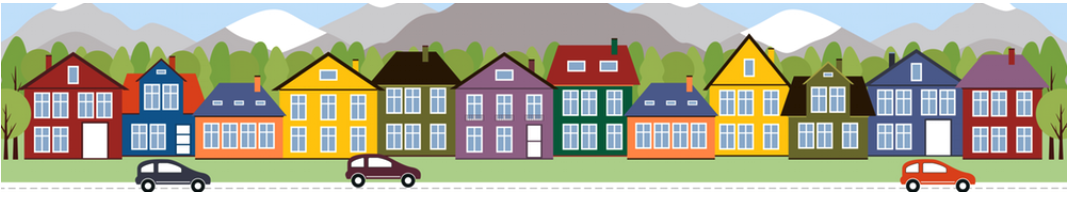

이번 프로젝트에서는 kaggle korea에서 진행된 house prices prediction이며,
대회 데이터를 이용해서 예측 모델을 만들어보겠습니다.

모델은 미국 Washington주 Seattle 지역에 대한 부동산 가격을 맞추는 것입니다. 

trainining 데이터로 약 1만 5천개 데이터가 주어지고, 약 20개 feature로 구성되었니다.

목표는 이번 metric인 RMSE 값 110,000 이하로 떨어트리는 것입니다. 

그럼 시작해보록 하겠습니다.

## (1) 데이터 불러오기

데이터 분석을 위해서 우선 데이터를 불러오겠습니다. 

In [31]:
import os
project_path = '../data/house_prices'
training_path = project_path + '/train.csv'
test_path = project_path + '/test.csv'

In [32]:
import pandas as pd
train = pd.read_csv(training_path)
test =  pd.read_csv(test_path)
print('train: ',train.shape)
print('test: ',test.shape)

print(set(train.columns)- set(test.columns))

train:  (15035, 21)
test:  (6468, 20)
{'price'}


## (2) EDA

모델링에 앞서 데이터를 탐색하겠습니다.

먼저 전체적인 데이터를 살펴본 후, target column과 feature들의 특성을 확인하겠습니다. 

제일 먼저 전체적인 요약을 보겠습니다. 

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

`'id'`, `'date'`가 제일 먼저 눈에 들어오네요.

'id'는 분석에는 큰 의미가 없을 것 같으니, 제외를 하겠습니다. 

그리고 'date' 특성은 object 자료형으로 저장이 되어 있습니다. 

모델에 사용하기 위해서는 자료 변환이 필요할 것 같습니다. 

### 2.1. 결측값 확인

위에서 살펴보긴 하였으나, 결측치가 있는지 다시 한번 확인해보겠습니다. 

In [34]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

결측치는 없어서 데이터 imputation은 전처리 과정 없이 진행하겠습니다. 

## 2.2. 중복데이터 확인

중복 데이터도 없습니다.

In [35]:
train.duplicated().sum()

0

## 2.3. features 확인

그럼 이제 feature별 EDA를 진행하겠습니다. 

각 feature들의 정의를 살펴보겠습니다. 

아래 내용은 캐들에서 제공된 data description 내용을 복사하였습니다. 

https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/data

### 2.3.1. features 정의
---
**Data fields**

- `INT`
    - ID : 집을 구분하는 번호 ⚠️
    - bedrooms : 침실의 수 
    - sqft_living : 주거 공간의 평방 피트(면적)
    - sqft_lot : 부지의 평방 피트(면적)
    - waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
    - view : 집이 얼마나 좋아 보이는지의 정도
    - condition : 집의 전반적인 상태
    - grade : King County grading 시스템 기준으로 매긴 집의 등급
    - sqft_above : 지하실을 제외한 평방 피트(면적)
    - sqft_basement : 지하실의 평방 피트(면적)
    - yr_built : 지어진 년도 #flag : date?
    - yr_renovated : 집을 재건축한 년도 
    - zipcode : 우편번호 
    - sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
    - sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)


>\* *Grade(King County Grading System)*
>- 건축상태, 건축비용, 건축 디자인, 건축옵션 들을 고려한 체첨 시스템 </br>[source] >https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

- `FLOAT`
    - bathrooms : 화장실의 수 ⚠️
    - floors : 집의 층 수 ⚠️
    - lat : 위도 
    - long : 경도 
    

- `OBJECT`
    - date : 집을 구매한 날짜 ⚠️


- `TARGET`
    - price : 집의 가격(Target variable)
    
`⚠️ : 주의깊게 살펴봐야할 feature`

⚠️ 몇개의 변수는 'int' 타입이 더 적합할 것으로 보입니다. 자세히 살펴볼 필요가 있습니다. 

###  2.3.2. dtypes?

In [36]:
train.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

EDA를 조금 더 편리하게 하기 위해서, 자료형별 feature를 나눠서 분석하겠습니다. 

`int`, `float`, `object` 자료형 별 feature를 별도 list에 저장하겠습니다. 

In [37]:
col_int = [train.dtypes.index[i] for i in range(len(train.dtypes)) if train.dtypes[i] == 'int64']
col_float = [train.dtypes.index[i] for i in range(len(train.dtypes)) if train.dtypes[i] == 'float64' and train.dtypes.index[i] != 'price']
col_object = [train.dtypes.index[i] for i in range(len(train.dtypes)) if train.dtypes[i] == 'object']
target = 'price'

print('col_int : ', col_int)
print('col_float : ', col_float)
print('col_object : ', col_object)

col_int :  ['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
col_float :  ['bathrooms', 'floors', 'lat', 'long']
col_object :  ['date']


### 2.4. features correlations

먼저 변수간에 상관관계를 파악하겠습니다. 

상관계수가 -1 또는 1가 가까울수록 선형관계가 강하다는 뜻입니다. 

상관계수가 높으면 예측변수로써 중요한 feature인 것을 알수 있습니다.

단, 상관계수와 인과관계를 혼동해서는 안된다는 점은 기억해두시길 바랍니다. 

상관계수가 높다고해서 target에 원인이 되는 변수는 아닙니다. 

https://otexts.com/fppkr/causality.html

In [38]:
train.corr().style.background_gradient(cmap='YlGn')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


상관계수를 살펴본 결과 높은 수치를 보이는 변수들이 있습니다. 

수치가 너무 높은 경우 multinearilty 문제가 발생할 가능성이 있습니다. 쉽게 설명하자면 linear regression 같은 경우 독립변수들은 '독립'된 변수를 가정하지만, 상관관계가 높으면 변수들간에 서로 독립되지 않았다는 가능성이 있을 수 있습니다. 

아래 feature들이 높은 상관계수를 보였습니다. 

High Correlations :

- sqft_living & sqft_above (0.88)
- sqft_living & grade (0.76)
- sqft_living & sqft_living15 (0.76)
- sqft_living & bathrooms (0.75)


* https://www.investopedia.com/terms/m/multicollinearity.asp

### 2.5. target column

target 값에 특성을 파악해보겠습니다. 

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

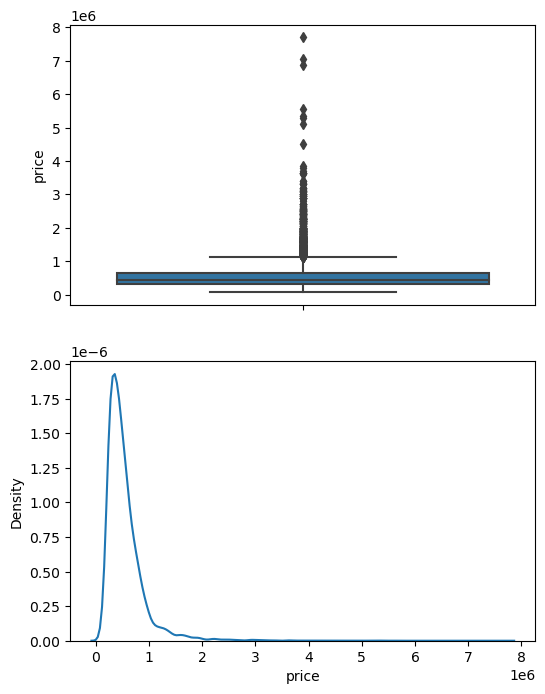

In [40]:
price = train[target]
fig = plt.figure(figsize = (6,8))
ax = fig.add_subplot(2,1,1)
sns.boxplot(y=price)

ax1 = fig.add_subplot(2,1,2)
sns.kdeplot(x=price)

plt.show()

보시는 것과 같이 오른쪽으로 결과 값이 쏠려 있는 것을 볼 수 있습니다. 

분석시에 log 정규화를 통해 보다 모델링에 도움을 줄 수 있게 전처리하겠습니다. 

당연히 RMSE 성능 평가시에는 다시 원래대로 돌려야겠죠?

`또한 그래프를 봣을때 이상치가 있어 보이네요.`

In [41]:
# remove outliers
train[train['price'] < 6000000]
train = train[train['price'] < 6000000]

### 2.6. int64 features
---

feature들 각각 살펴보겠습니다. 먼저 int 자료형 feature들 부터 분석하겠습니다. 

시각화 작업을 보다 편리하게 하기 위해 histogram & scatter 또는 countplot & scatter  또는 histogram & boxplot 또는 countplot & boxplot 그래프를 쌍으로 볼 수 있게 함수를 생성하겠습니다.

In [42]:
def graph_hist_scatter(dataset, feature, target):
    fig = plt.figure(figsize = (12,4))

    ax = fig.add_subplot(1,2,1)
    sns.histplot(data=dataset, x=feature)
    plt.title(f'{feature} hist')
    plt.xlabel('')

    ax = fig.add_subplot(1,2,2)
    sns.regplot(data=dataset, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel('')
    plt.show()

In [43]:
def graph_count_scatter(dataset, feature, target):
    fig = plt.figure(figsize = (12,4))

    ax = fig.add_subplot(1,2,1)
    sns.countplot(data=dataset, x=feature)
    plt.title(f'{feature} count')
    plt.xlabel('')

    ax = fig.add_subplot(1,2,2)
    sns.regplot(data=dataset, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel('')
    plt.show()

In [44]:
def graph_count_box(dataset, feature, target):
    fig = plt.figure(figsize = (12,4))

    ax = fig.add_subplot(1,2,1)
    sns.countplot(data=dataset, x=feature)
    plt.title(f'{feature} count')
    plt.xlabel('')

    ax = fig.add_subplot(1,2,2)
    sns.boxplot(data=dataset, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel('')
    plt.show()

In [45]:
def graph_hist_box(dataset, feature, target):
    fig = plt.figure(figsize = (12,4))

    ax = fig.add_subplot(1,2,1)
    sns.histplot(data=dataset, x=feature)
    plt.title(f'{feature} hist')

    ax = fig.add_subplot(1,2,2)
    sns.boxplot(data=dataset, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.show()

### 2.6.1. ID

ID는 각 데이터의 고유번호로 큰 의미가 없습니다. 모델 분석시에는 제외하도록 하겠습니다.

### 2.6.2. Bedrooms

침실이 2~8개 정도 있는 집들이 가격이 높은 것들 상대적으로 많은 것으로 보이네요. 물론 침실 갯수로만으로는 가격을 맞추는 것은 어려울 것 같습니다.

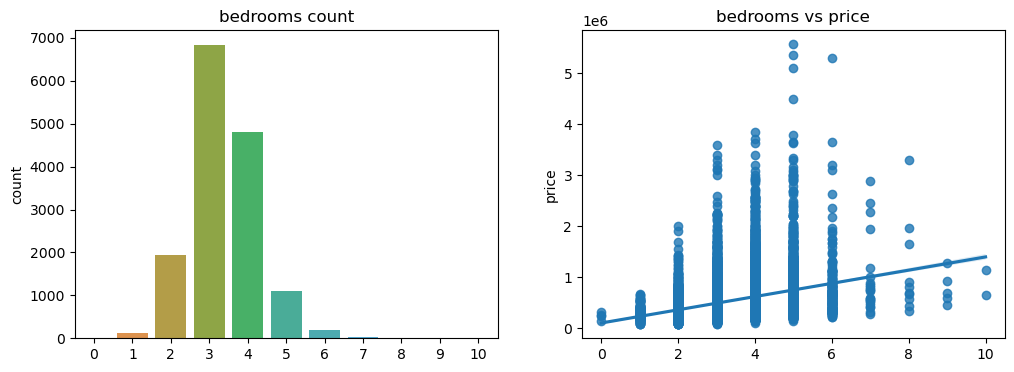

In [46]:
graph_count_scatter(train, 'bedrooms', 'price')

### 2.6.3. sqft_living vs sqft_above vs sqft_basement

집 평수를 살펴보겠습니다. 

평수 feature 같은 경우 위에서 살짝 살펴봤지만, 상관계수가 높았습니다. 

feature들을 자세히 살펴보면 높은 이유를 알겠네요. 

기존에 있었던 feature들로 만들어진 feature 또는 업데이트된 변수입니다. 

예) sqft_basement = sqft_living - sqft_above


In [47]:
# sqft_living - sqft_above = sqft_basement
train[['sqft_living15','sqft_living','sqft_above','sqft_basement','sqft_lot','sqft_lot15']]

,sqft_living15,sqft_living,sqft_above,sqft_basement,sqft_lot,sqft_lot15
0,1340,1180,1180,0,5650,5650
1,2720,770,770,0,10000,8062
2,1800,1680,1680,0,8080,7503
3,2238,1715,1715,0,6819,6819
4,1650,1060,1060,0,9711,9711
...,...,...,...,...,...,...
15030,2520,2520,2520,0,6023,6023
15031,2050,3510,2600,910,7200,6200
15032,1530,1530,1530,0,1131,1509
15033,1830,2310,2310,0,5813,7200


그래프를 그려서 어떤 형태인지 알아보겠습니다. 

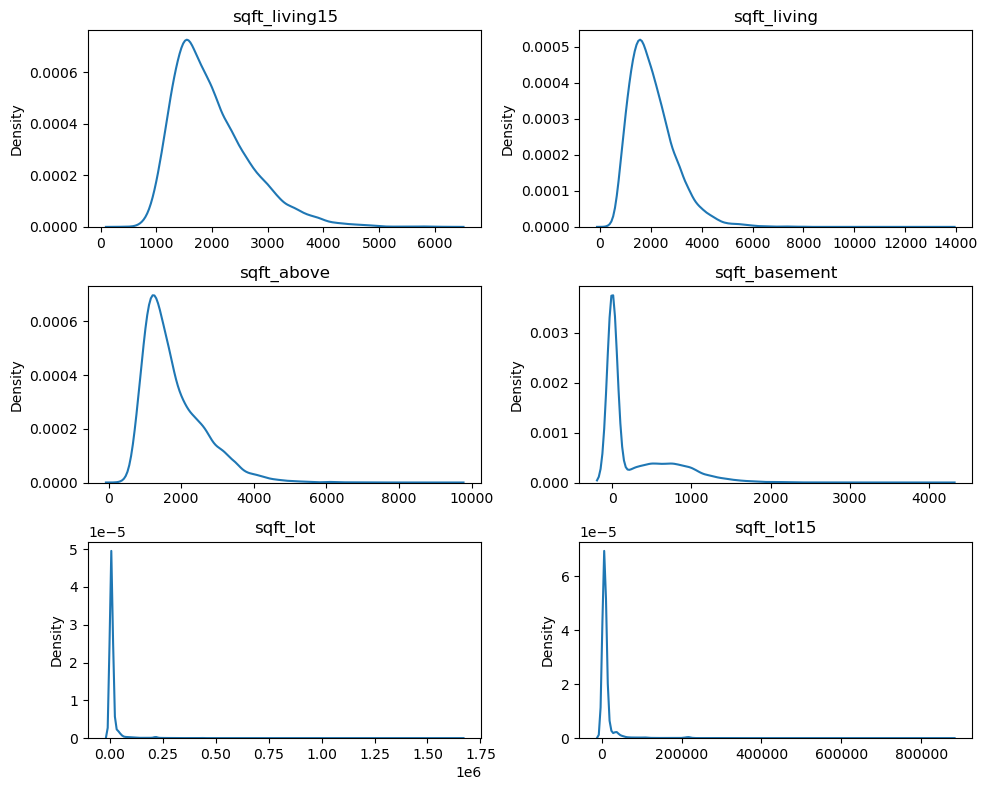

In [48]:
sqft =['sqft_living15','sqft_living','sqft_above','sqft_basement','sqft_lot','sqft_lot15']

fig = plt.figure(figsize = (10,8))
for i, col in enumerate(sqft) :
    ax = fig.add_subplot(3,2,i+1)
    sns.kdeplot(data=train,x=col)
    plt.xlabel('')
    plt.title(col)

plt.tight_layout()
plt.show()

target 값과 유사한 모양을 갖고 있습니다. 모두 왼쪽으로 값들이 기울어져 있습니다. 

조금더 정확하게 측정하기 위해서 왜도 값을 계산해보겠습니다. 

scipy.stats에 skew를 이용해보겠습니다. 

1보다 크거나 -1보다 작은 경우 왜도 값이 큰 것입니다. 

In [49]:
from scipy.stats import skew

모든 feature들의 왜도 값이 1 이상입니다. 

target 값들처럼 np.log1p 를 이용해서 정규화 작업을 해줄 필요가 있습니다.

In [50]:
for i in sqft :
    print(f'Skewness of {i} : {skew(train[i])}')

Skewness of sqft_living15 : 1.1245791992721614
Skewness of sqft_living : 1.3662992910648408
Skewness of sqft_above : 1.3586428334669851
Skewness of sqft_basement : 1.5383473836638848
Skewness of sqft_lot : 13.348714594309834
Skewness of sqft_lot15 : 10.027990160682432


target(price)과 같이 그래프를 그려봣을 때 어떤 모양이 만들어지는 지 확인하겠습니다. 

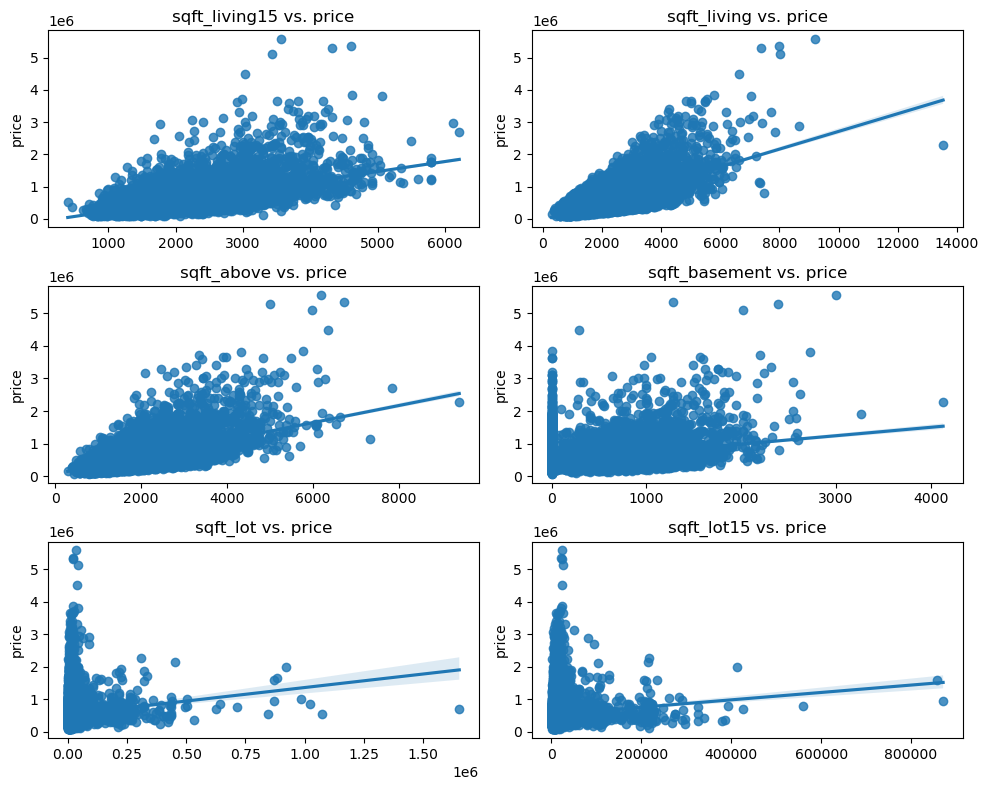

In [51]:
fig = plt.figure(figsize = (10,8))
for i, col in enumerate(sqft) :
    ax = fig.add_subplot(3,2,i+1)
    sns.regplot(data=train,x=col, y='price')
    plt.xlabel('')
    plt.title(f"{col} vs. price")

plt.tight_layout()
plt.show()

평수가 커질수록 가격이 올라가는 것을 볼 수 있습니다. 물론 지하 평수나 주차 평수같은 feature로는 가격 예측에는 큰도움 받기 힘들어 보이네요. 

### 2.6.4. waterfront

Seattle은 사방이 강이기 때문에 어느 곳이나 쉽게 water front가 있을 것 같습니다. 

가격 예측하는데는 이 도시에서는 큰 도움을 받기는 어려울 것 같습니다. 

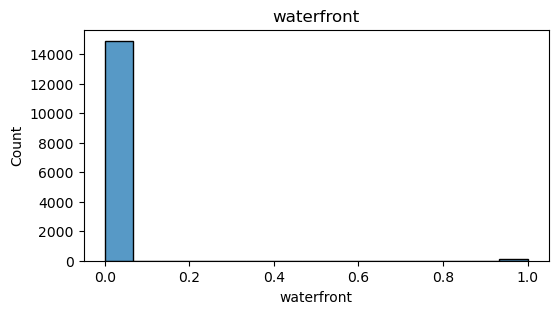

In [52]:
fig = plt.figure(figsize = (6,3))
sns.histplot(train['waterfront'])
plt.title('waterfront')
plt.show()

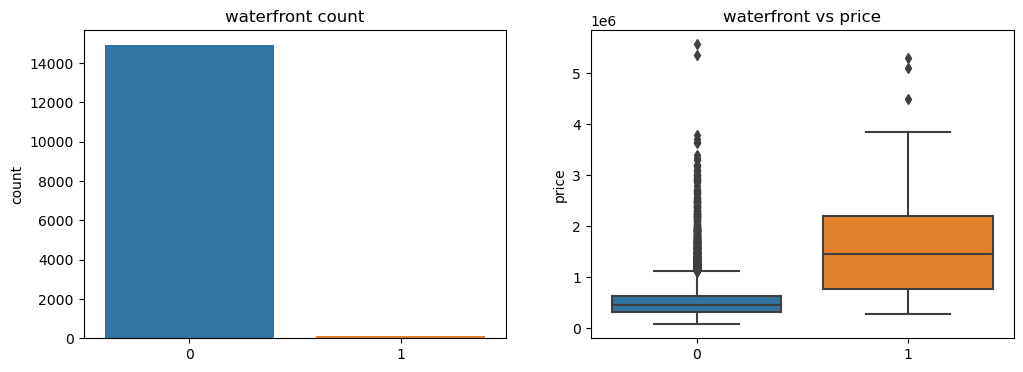

In [53]:
graph_count_box(train, 'waterfront', 'price')

boxplot을 살펴보면 그래도 waterfront가 true인 집들이 가격이 평균적으로는 높은 것을 확인할 수 있습니다. 

### 2.6.5. view

다음으로는 집에 뷰(?) 얼마나 보기 좋은지를 측정한 값입니다. 

집이 육안으로 봤을때 건축 디자인이 잘 되어 있으면 가격이 더 높아지겠죠?

그래프로 이게 사실인지 살펴보겠습니다. 

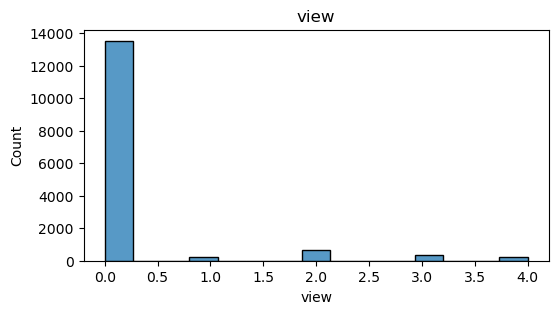

In [54]:
fig = plt.figure(figsize = (6,3))
sns.histplot(train['view'])
plt.title('view')
plt.show()

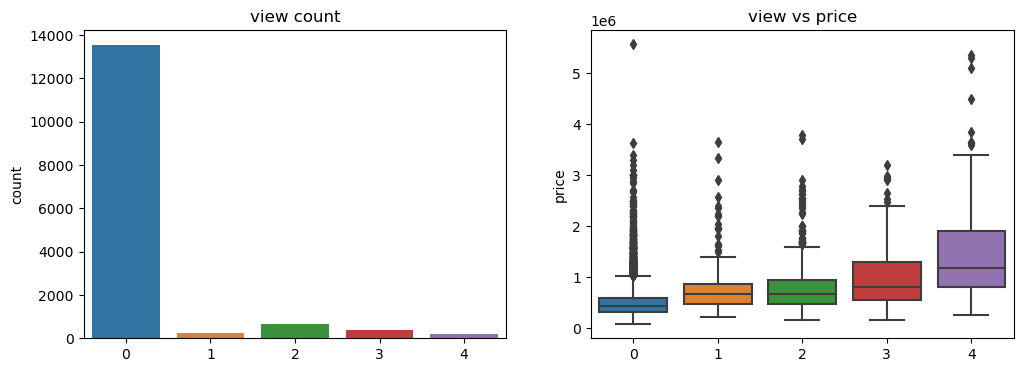

In [55]:
graph_count_box(train, 'view', 'price')

평균적으로는 뷰가 좋을수록 가격도 높아지는 것이 보이네요. 물론 각 view 구간별로 살펴보면 아웃라이어들이 있는 것을 보실 수 있어서, linear regression 같은 모델에서는 예측할때 많은 영향을 받을 것으로 예상됩니다. 

### 2.6.6. condition

집 관리 상태condition도 가격과 어떤 관계가 있는지 확인하겠습니다. 

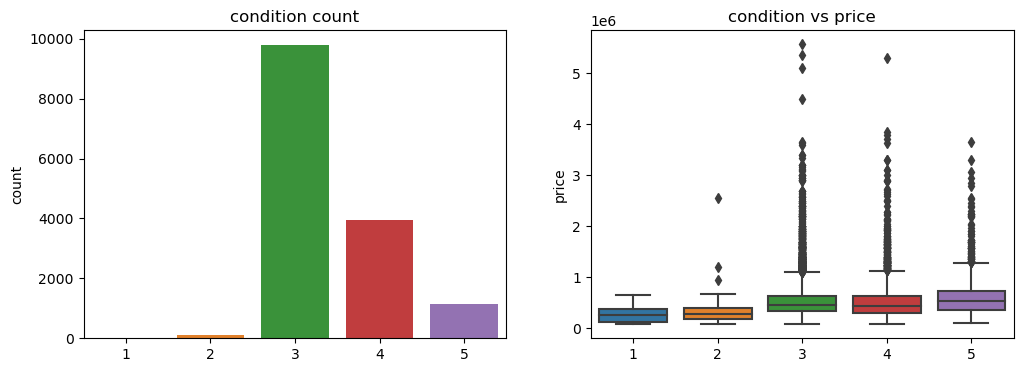

In [56]:
graph_count_box(train, 'condition', 'price')

집 관리는 크게 가격을 설명하는 feature로 보이지는 않습니다. 

### 2.6.7. grade

grade는 종합적인 요소 집상태, 집 디자인, 건축비용 등을 고려해서 점수를 낸 지표입니다. 

이 feature는 기대가 되네요.

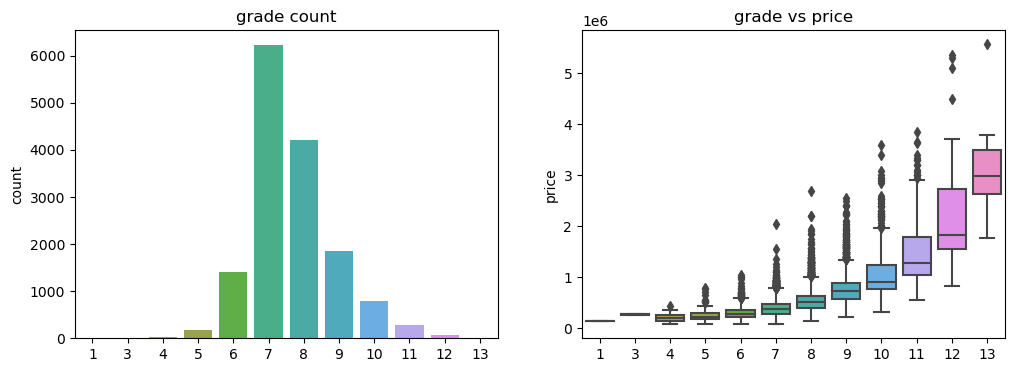

In [57]:
graph_count_box(train, 'grade', 'price')

예상했던 것처럼 grade feature는 어느 정도 가격을 예측하는 도움이 될것으로 보이네요. 

### 2.6.8. yr_built & yr_renovated

건축년도는 어떤 관계가 있을까요?

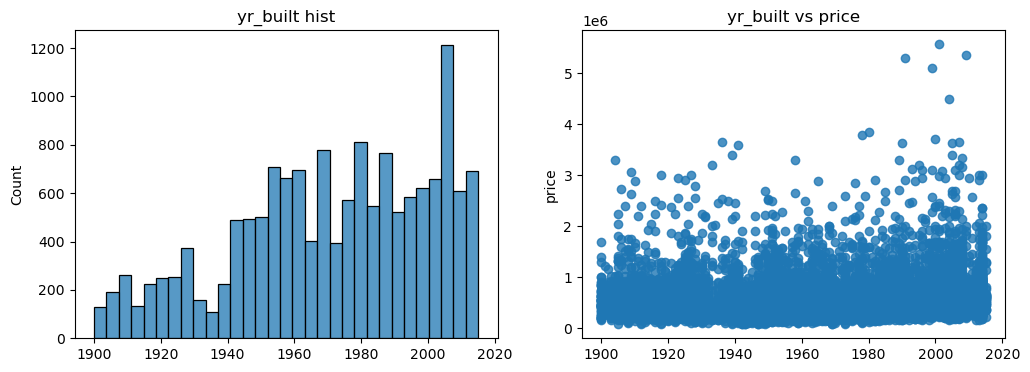

In [58]:
graph_hist_scatter(train,'yr_built','price')

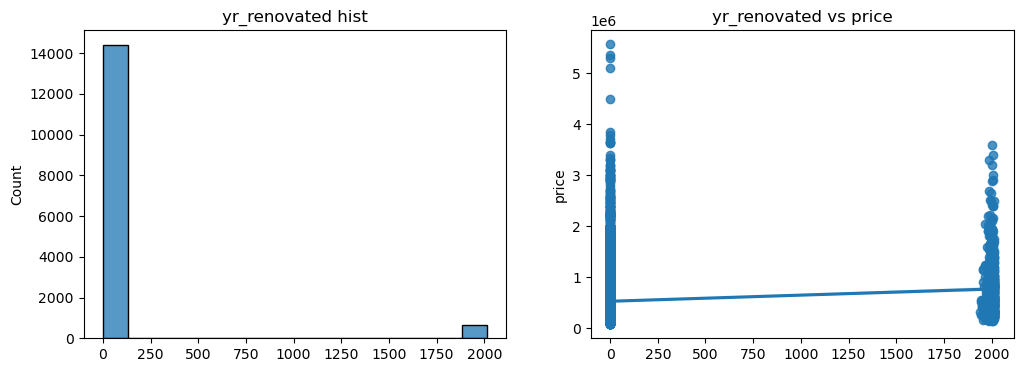

In [59]:
graph_hist_scatter(train,'yr_renovated','price')

최근에 지어진 것 만으로는 당연히 알수 없겠죠? 비싼집 보다 낮은 가격에 집들도 최근에 지어질 수 있으니...

### 2.6.9. zipcode

우편번호는? 당연히 모르겠죠? 패턴이 혹시 있을 수 있으니 가격과 같이 그래프를 만들어보겠습니다. 

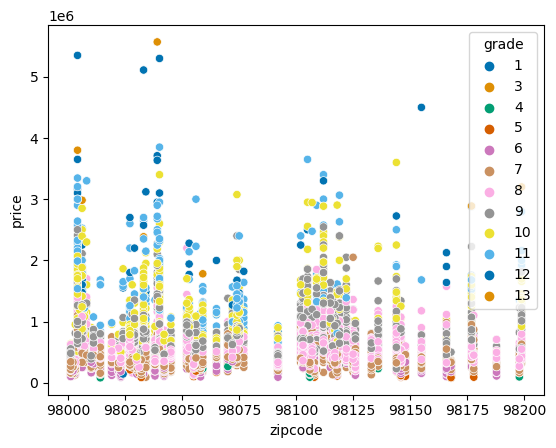

In [60]:
sns.scatterplot(data=train, y='price', x='zipcode', hue= 'grade', palette = 'colorblind')
plt.show()

우편번호로만으로는 잘 모르겠습니다. 그러나 98000 ~ 98025에 사이에 있는 집들 중 높은 가격이 있는 집들이 상대적으로 많은 것은 보입니다. 

### 2.7. float features

---

### 2.7.1 bathrooms

화장실수 feature를 확인하겠습니다. 

화장실의 수가 0 또는 0.5개도 있습니다. 혹시 .5는 share 화장실인가요?

데이터 description에는 나오지 않은 것 같습니다. 

우선 그래프로 price와의 관계가 어떤지 그려보겠습니다.

In [61]:
train['bathrooms'].value_counts().sort_index()

0.00       4
0.50       3
0.75      45
1.00    2675
1.25       5
1.50    1009
1.75    2112
2.00    1357
2.25    1433
2.50    3748
2.75     843
3.00     493
3.25     410
3.50     510
3.75     108
4.00     100
4.25      57
4.50      63
4.75      16
5.00      14
5.25      11
5.50       7
5.75       3
6.00       2
6.25       1
6.75       1
7.50       1
8.00       1
Name: bathrooms, dtype: int64

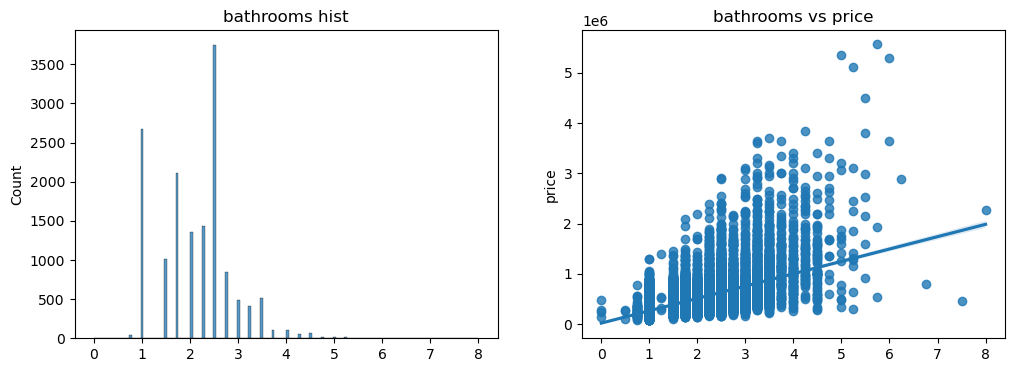

In [62]:
graph_hist_scatter(train, 'bathrooms','price')

화장실이 많아질수록 가격도 올라가네요. 

### 2.7.2. floor

2층집? 1층집? 3층집? 어떤 집이 가격이 높을까요?

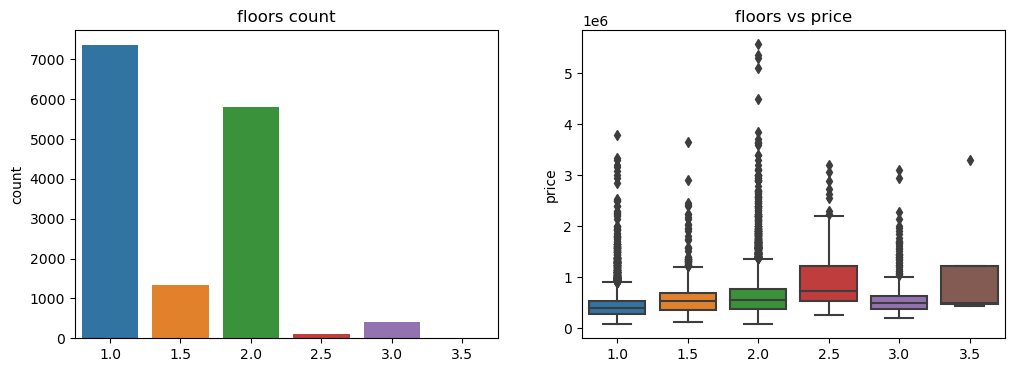

In [63]:
graph_count_box(train, 'floors','price')

층수가 2.5 그리고 3.5인 집들이 상대적으로 가격이 살짝 높은 것을 보실 수 있습니다. 물론 countplot에 보시면 그런 집들에 대한 데이터는 상당히 적습니다. 

### 2.7.3. latitude and longitude

보통 부동산 가격은 위치에 따라 가격이 많이 정해집니다. 위도 경도 feature를 최대한 잘 활용해보도록 하겠습니다. 위도 경도를 plot으로 찍으면 어떤 내용이 나오는지 확인하겠습니다. 

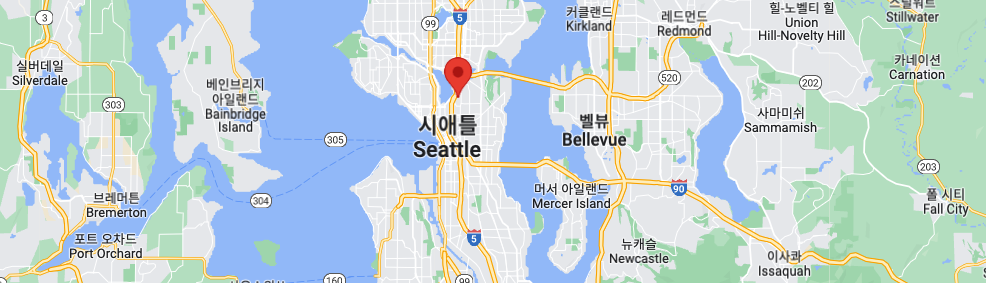

그 전에 집 가격을 5개 구간으로 나눠서 hue를 설정해서 구역이 잘 나눠지는지 확인하겠습니다. 

In [64]:
train['pricerange'] = pd.qcut(x = train['price'], q =5, labels=[1,2,3,4,5] )

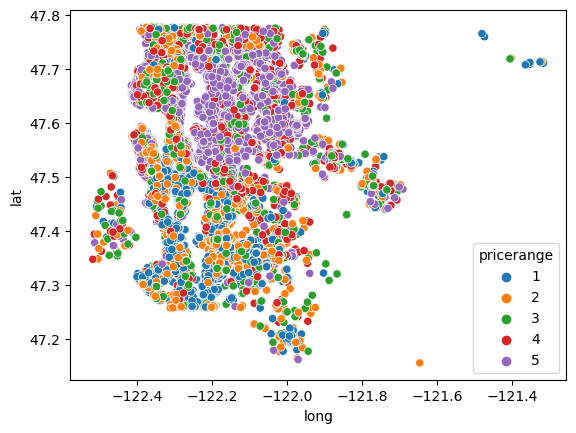

In [65]:
sns.scatterplot(data= train,x='long',y ='lat', hue='pricerange')
plt.show()

매우 정확하지는 않지만 pricerange별로 어느정도 지역들이 군집이 되어 있는 것 처럼 보이네요. 

주요 도시와의 거리를 계산해서 새로운 feature로 추가하는 것도 좋을 것 같습니다. 

한국처럼 수도권과 가까울수록 집값들이 높죠? 미국도 비슷할 것 같아 시도해보겠씁니다. 

주요 도시로 Seattle과 Bellavue가 보입니다.

주요 도시와의 거리도 가격을 설명해주는 feature로 사용하면 좋을 것 같습니다. 

거리를 측정해주는 방법으로는 harvesine 함수를 사용하겠습니다. 

식은 다음 이미지와 같습니다. 

이를 이용해서 주요 도시 Seattle과 Bellavue와의 거리를 측정해서 새로운 feature를 만들어보겠습니다. 

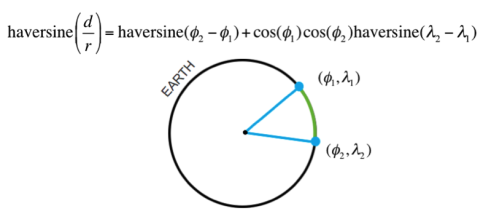

https://medium.com/@krexvelasco/transforming-categorical-information-into-usable-measures-in-a-machine-learning-model-e2910bbb3fc7

In [66]:
# !pip install haversine

In [67]:
from haversine import haversine, Unit

In [68]:
seattle = [46.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [69]:
haversine(seattle, bellevue,unit=Unit.MILES)

69.8102115661099

In [70]:
#train
train['coordinates'] = list(zip(train['lat'],train['long']))
train['seattle_dist'] = train['coordinates'].apply(lambda x: haversine(x,seattle,unit =Unit.MILES))
train['bellevue_dist'] = train['coordinates'].apply(lambda x: haversine(x,bellevue,unit =Unit.MILES))

#test
test['coordinates'] = list(zip(test['lat'],test['long']))
test['seattle_dist'] = test['coordinates'].apply(lambda x: haversine(x,seattle,unit =Unit.MILES))
test['bellevue_dist'] = test['coordinates'].apply(lambda x: haversine(x,bellevue,unit =Unit.MILES))

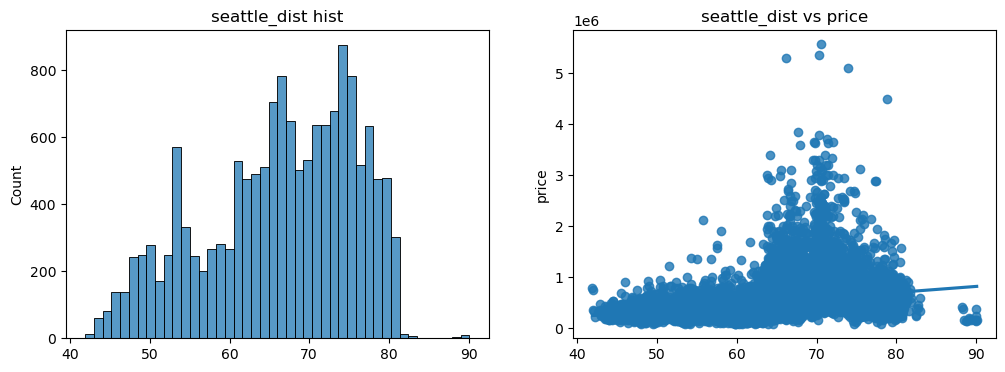

In [71]:
graph_hist_scatter(train, 'seattle_dist','price')

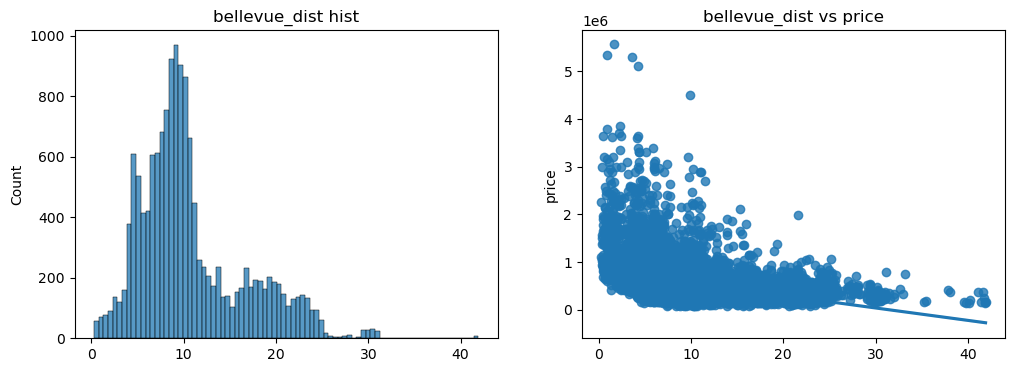

In [72]:
graph_hist_scatter(train, 'bellevue_dist','price')

In [73]:
train[['price','seattle_dist','bellevue_dist','lat','long']].corr().style.background_gradient(cmap='YlGn')

,price,seattle_dist,bellevue_dist,lat,long
price,1.000000,0.310942,-0.417332,0.309819,0.025594
seattle_dist,0.310942,1.000000,-0.665851,0.994206,-0.039761
bellevue_dist,-0.417332,-0.665851,1.000000,-0.703235,0.245347
lat,0.309819,0.994206,-0.703235,1.000000,-0.133435
long,0.025594,-0.039761,0.245347,-0.133435,1.000000


Seattle과의 거리가 중간정도 되는 집들이 상대적으로 집값이 높고, Bellvue와 거리가 가까울수록 가격이 높아지는 것을 볼 수 있습니다. 

그럼 다른 18개 지역들도 분석에 도움이 될 것 같아, 추가해보도록 하겠습니다. 

In [74]:
ballard = (47.682061, -122.393882)
lakecity =(47.723538, -122.286637)
wedgewood = (47.689600, -122.295537)
wu = (47.656250, -122.311010)
wf =(47.656627, -122.339032)
lp = (47.652656, -122.397650)
sn =(47.614038, -122.347546)
ch =(47.621543, -122.317746)
wp =(47.626178, -122.288273)
square = (47.600188, -122.332234)
norhtadmiral = (47.576393, -122.390178)
roxhill = (47.522859, -122.374381)
georgetown =(47.550410, -122.328636)
kubota = (47.516414, -122.272688)
colombia = (47.555963, -122.275979)
sodo =(47.585051, -122.330610)
cdis =(47.605163, -122.297362)
madrona =(47.616688, -122.293445)
walling =(47.668264, -122.329730)

In [75]:
points =[ballard, lakecity, wedgewood, wu, wf, lp, sn, ch, wp, square, norhtadmiral, roxhill, georgetown, kubota, colombia, sodo, cdis, madrona, walling]
points[8]

(47.626178, -122.288273)

In [76]:
len(points)

19

In [77]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 19, init = points, n_init=1, random_state=2022)
clusterdata = train.loc[:,['lat', 'long']].values
kmean.fit(clusterdata)
kmean.labels_
train['region'] = kmean.labels_
clusterdata_test = test.loc[:,['lat', 'long']].values
kmean.fit_transform(clusterdata_test)
test['region'] =  kmean.labels_

지역별로 kmeans을 이용해 군집하면 다음과 같은 모양이 만들어집니다. 

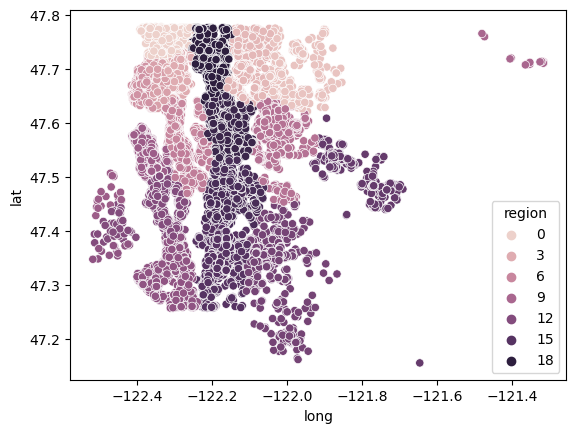

In [78]:
sns.scatterplot(data= train,x='long',y ='lat', hue='region')
plt.show()

test 데이터 셋은 살짝 다르게 군집이 되고 있습니다...

이것을 해결할 방법은 다음에 고민해보겠습니다.

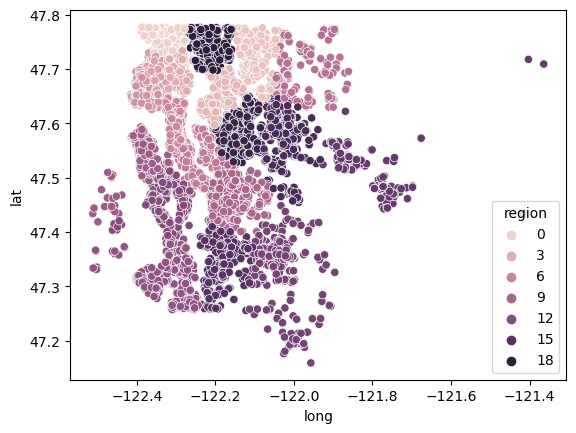

In [79]:
sns.scatterplot(data= test,x='long',y ='lat', hue='region')
plt.show()

지역별로 군집해서 분류한 데이터로 가격과의 관계를 봣을때는 균등하게 가격이 퍼져 있는 것을 확인하실 수 있습니다. 

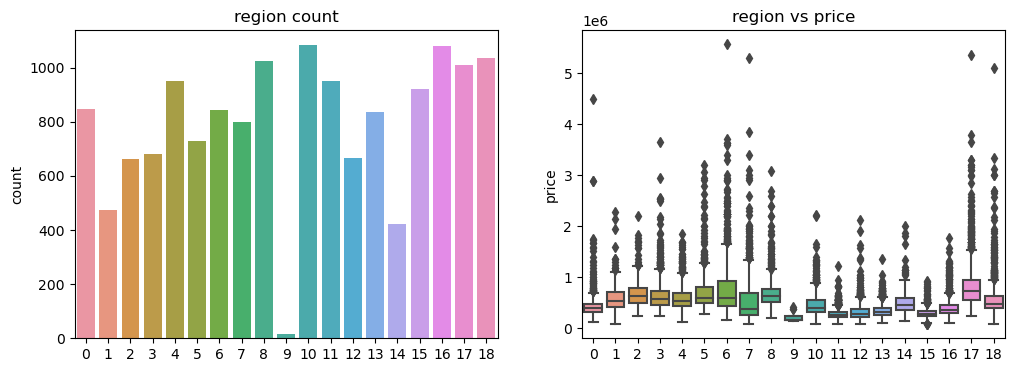

In [80]:
graph_count_box(train, 'region','price')

In [81]:
train['region'].value_counts()

10    1084
16    1081
18    1037
8     1024
17    1010
11     951
4      949
15     921
0      849
6      842
13     835
7      801
5      729
3      680
12     665
2      664
1      473
14     423
9       14
Name: region, dtype: int64

그렇다면 위에 지역 8개의 centroid과의 거리를 계산해서 넣을 때는 어떤지 확인하겠습니다. 

In [82]:
mapping = {0 : (47.682061, -122.393882),
1 : (47.723538, -122.286637),
2 : (47.689600, -122.295537),
3 : (47.656250, -122.311010),
4 : (47.656627, -122.339032),
5 : (47.652656, -122.397650),
6 : (47.614038, -122.347546),
7 : (47.621543, -122.317746),
8 : (47.626178, -122.288273),
9 : (47.600188, -122.332234),
10 : (47.576393, -122.390178),
11 : (47.522859, -122.374381),
12 : (47.550410, -122.328636),
13 : (47.516414, -122.272688),
14 : (47.555963, -122.275979),
15 : (47.585051, -122.330610),
16 : (47.605163, -122.297362),
17 : (47.616688, -122.293445),
18 : (47.668264, -122.329730)}

for data in [train, test] :
    data['centroid'] = data['region'].apply(lambda x : mapping[x])
    data['centroid_dist'] = data.apply(lambda x : haversine(x['centroid'],x['coordinates'],unit =Unit.MILES),axis=1)
    data['centroid_dist']

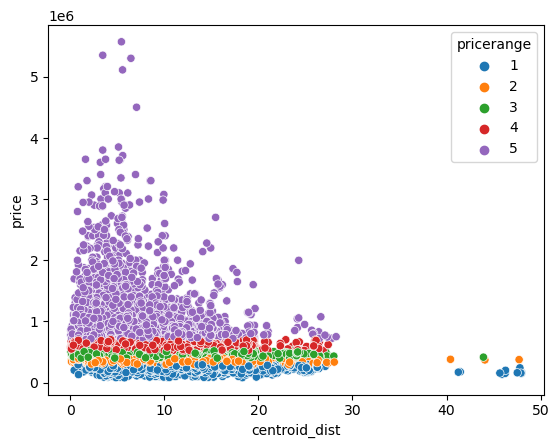

In [83]:
sns.scatterplot(data =train , x='centroid_dist', y='price', hue='pricerange')
plt.show()

오! centroid와의 거리가 가까울수록 가격이 높아 지는 것을 확인 하실 수 있습니다. 

### 2.7. date feature

date feature는 현재 object 자료형입니다. 회귀 모델에 사용하기 위해서 숫자로 바꿔주겠습니다. 

In [1523]:
train['date'].describe()

count               15032
unique                365
top       20140623T000000
freq                  101
Name: date, dtype: object

In [1524]:
#train
train['date'] = train['date'].apply(lambda x : x[:8]).astype(int)

#test
test['date'] = test['date'].apply(lambda x : x[:8]).astype(int)

In [1525]:
train['date'].describe()

count    1.503200e+04
mean     2.014387e+07
std      4.425365e+03
min      2.014050e+07
25%      2.014072e+07
50%      2.014102e+07
75%      2.015021e+07
max      2.015051e+07
Name: date, dtype: float64

## (3) Feature Engineering and Feature Selection and Feature Scaling

이제 feature engineering을 통해 몇가지 변수를 더 만들고, 정규화 작업을 거친 후 모델링 작업을 진행하도록 하겠습니다. 

feature engineering은 캐글대회에서 이미 만들어진 내용을 복사하였습니다. 

### 3.1. Feature Engineering

In [1526]:
#train
train['floor_area_ratio'] = train['sqft_living'] / train['sqft_lot']
train['rooms'] = train['bedrooms'] + train['bathrooms']
train['grade_condition'] = train['grade'] * train['condition']
train['sqft_total_size'] = train['sqft_above'] + train['sqft_basement']

#test
test['floor_area_ratio'] = test['sqft_living'] / test['sqft_lot']
test['rooms'] = test['bedrooms'] + test['bathrooms']
test['grade_condition'] = test['grade'] * test['condition']
test['sqft_total_size'] = test['sqft_above'] + test['sqft_basement']

# source : https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12

In [1527]:
for df in [train, test]:
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

지역 feature는 범주형이기때문에 원핫 엔코딩을 하겠습니다. 

In [1528]:
#one-hot encoding
train = pd.get_dummies(train, columns = ['region'])
test = pd.get_dummies(test, columns = ['region'])

### 3.2. Feature Selection

이제 모델링에 필요한 feature들은 정리하겠습니다. 

In [1529]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'pricerange',
       'coordinates', 'seattle_dist', 'bellevue_dist', 'centroid',
       'centroid_dist', 'floor_area_ratio', 'rooms', 'grade_condition',
       'sqft_total_size', 'region_0', 'region_1', 'region_2', 'region_3',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'region_10', 'region_11', 'region_12', 'region_13', 'region_14',
       'region_15', 'region_16', 'region_17', 'region_18'],
      dtype='object')

In [1530]:
set(train.columns) - set(test.columns)

{'price', 'pricerange'}

In [1531]:
removing_feature = ['id', 'coordinates', 'centroid','price','pricerange'] #'lat','long','sqft_living15','sqft_above',

removing_feature.extend(['sqft_living', 'region_9','region_18', 'region_1', 'region_11', 'region_13', 'region_17', 'region_14'])

In [1532]:
selected_feature = list(set(train.columns) - set(removing_feature))

In [1533]:
import numpy as np

for i in sqft :
    train[i] = train[i].apply(lambda x : np.log1p(x))
    test[i] = test[i].apply(lambda x : np.log1p(x))

In [1534]:
X_train = train[selected_feature].values
y_train = train['price'].apply(lambda x : np.log1p(x))
X_test = test[selected_feature].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(15032, 37)
(15032,)
(6468, 37)


### 3.3. Feature Scaling

In [1535]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [1536]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## (4) Train Validation Split

Train, Validation  dataset으로 분리하여 준비하겠습니다. 

In [1537]:
from sklearn.model_selection import train_test_split

In [1538]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

## (5) Model Baseline

여기서 부터 모델링 작업이 시작됩니다. 

노트북을 만들면서 수천번 코드 실행을 해서 최고 점수를 만들어보려고 했습니다. 

위에 feature들도 중간 중간에 추가하고 삭제하는 작업들이 반복적으로 이루어졌습니다. 

모델링에 대한 설명은 많이 하지 않고, model hyper parameter tuning, cross validation, ensemble, blending 등이 이루어졌다는 내용 정도만 말씀드립니다. 

In [1539]:
# Import Model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Metric
from sklearn.metrics import mean_squared_error

In [1540]:
model = LGBMRegressor(random_state=2022)

def get_score_prediction(model, x,y, test, true) :
    model.fit(x,y)
    pred = model.predict(test)
    print('RMSE is :', mean_squared_error(np.expm1(true), np.expm1(pred)) ** 0.5)
    return np.expm1(pred)

get_score_prediction(model, X_t, y_t, X_v, y_v)

RMSE is : 107117.92927203917


array([831983.34844467, 514027.38774424, 184030.16612853, ...,
       668242.56447993, 520834.69906041, 211582.95445378])

In [1541]:
model2 = XGBRegressor(random_state=2022)
get_score_prediction(model2, X_t, y_t, X_v, y_v)

RMSE is : 116642.8856870415


array([805759.4 , 417380.22, 181328.72, ..., 666924.6 , 505228.3 ,
       233927.78], dtype=float32)

In [1542]:
model3 = RandomForestRegressor(random_state=2022)
get_score_prediction(model3, X_t, y_t, X_v, y_v)

RMSE is : 131538.62477904127


array([891205.90972807, 476809.33467513, 168676.90347158, ...,
       623328.17465556, 489460.52974688, 232132.97384675])

In [1543]:
model4 = RidgeCV(cv=10)
get_score_prediction(model4, X_t, y_t, X_v, y_v)

RMSE is : 141266.6342165597


array([935244.08285722, 482171.03440414, 199765.30399702, ...,
       755282.26410866, 512644.65028528, 249114.54857753])

In [1544]:
model5 = LinearRegression()
get_score_prediction(model5, X_t, y_t, X_v, y_v)

RMSE is : 141212.3557614117


array([934511.09280135, 481918.87370625, 199672.18937004, ...,
       754268.10468747, 512663.55129585, 249099.92218735])

In [1545]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Features"] = train[selected_feature].columns
vif["VIF Values"] = [variance_inflation_factor(
    train[selected_feature].values, i) for i in range(train[selected_feature].shape[1])]

vif.sort_values(by='VIF Values',ascending=False)

/Users/seungyonglee/miniconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/seungyonglee/miniconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/seungyonglee/miniconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF Values
14,bathrooms,inf
23,bedrooms,inf
9,rooms,inf
34,lat,5.963694e+07
36,date,1.745371e+07
12,long,1.646484e+07
32,zipcode,1.147103e+07
8,yr_renovated,3.129439e+04
19,yr_built,3.073728e+04
15,seattle_dist,2.486438e+04


보통의 경우 10 이상이면 다중공선성이 존재한다고 말하는데, 위의 식에서는 waterfront, view, sqft_lot15, is_renovated 4가지 변수를 제외한 모든 변수들에서 다중공선성이 존재하는 문제점이 있습니다.

이를 해결하기 위한 방안으로는

- 다중공선성에 robust한 트리모델을 사용하는 방법
- 변수제거 및 FE, 변환등을 통한 대체
- 관측값을 늘려 표본의 크기를 증가

하지만 마지막 3의 방안은 실현이 불가능하고 선형회귀를 사용할거면 2를 최대한 활용하고, 그렇지 않을 경우에는 1번 방안을 사용하면 됩니다.

https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12#Ensemble

## (6) Model Tuning : Cross Validation & Hyper-Parameter Tuning

### 6.1. Cross Validation

In [1208]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1386]:
xgb = XGBRegressor(random_state=2022)
lgb = LGBMRegressor(random_state=2022)
rfr = RandomForestRegressor(random_state=2022)
ridge = RidgeCV(cv=10)
olr = LinearRegression()

# linear regression
# decision tree
# model extra

models  = [xgb,lgb,rfr,ridge,olr]

In [508]:
for model in models:
    result = cross_val_score(model, X_t, y_t, cv=5, n_jobs = 5)
    print(f'{model.__class__.__name__} : {result}')

XGBRegressor : [0.90292291 0.90035877 0.89425156 0.90374999 0.89068146]
LGBMRegressor : [0.9117328  0.90096411 0.90071789 0.9103111  0.89660289]
RandomForestRegressor : [0.89775716 0.88198798 0.88735781 0.89641709 0.88288083]
RidgeCV : [0.86663547 0.85505538 0.85038643 0.86083145 0.85435931]
LinearRegression : [0.86698375 0.85725441 0.85119918 0.86098705 0.85525172]


### 6.2. Hyper Parameter Tuning

In [402]:
from sklearn.model_selection import GridSearchCV

In [403]:
from tqdm import tqdm
import time

def myGrid(model, param,x, y):
    start = time.time()
    mygrid = GridSearchCV(model, param_grid = param, scoring = 'neg_mean_squared_error', n_jobs=5, verbose=1)
    mygrid.fit(x,y)
    params= mygrid.cv_results_['params']
    score= mygrid.cv_results_['mean_test_score']
    for i in tqdm(range(len(params))):
        params[i]['score'] = score[i]
    
    print(f'(time lapsed : {time.time() - start} sec.)')
    return pd.DataFrame(params).sort_values(by='score', ascending=False)

### 6.2.1. LGBMregressor 

In [261]:
param_grid = {'max_depth' : [-1,15,32], 'n_estimators' : [100,1100,3100], 
              'num_leaves':[43,50,112],'learning_rate': [0.1, 0.015]}

In [262]:
result = myGrid(lgb,param_grid,X_t,y_t)
result

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,learning_rate,max_depth,n_estimators,num_leaves,score
39,0.015,15,1100,43,-0.025543
40,0.015,15,1100,50,-0.025567
31,0.015,-1,1100,50,-0.025587
49,0.015,32,1100,50,-0.025587
30,0.015,-1,1100,43,-0.025605
48,0.015,32,1100,43,-0.025605
51,0.015,32,3100,43,-0.025611
33,0.015,-1,3100,43,-0.025611
42,0.015,15,3100,43,-0.025622
43,0.015,15,3100,50,-0.025740


In [1546]:
param_grid = {'max_depth' : 15, 'n_estimators' : 1100, 
              'num_leaves': 43,'learning_rate': 0.015}
lgb = LGBMRegressor(random_state=2022, objective= 'regression', **param_grid)
p1 = get_score_prediction(lgb, X_t, y_t,X_v, y_v)

RMSE is : 105711.66376807308


### 6.2.2. XGBRegressor 

In [1547]:
param_grid ={'colsample_bytree' : 0.4603, 'gamma' : 0.0468, 'learning_rate' : 0.015,
             'max_depth' : 15, 'min_child_weight' : 32, 'n_estimators' : 1100,
             'reg_alpha' : 0.4640,'reg_lambda' : 0.8571,'subsample' : 0.8}
xgb = XGBRegressor(random_state=2022, **param_grid)
p2 = get_score_prediction(xgb, X_t, y_t, X_v, y_v)

RMSE is : 106693.17487314192


### 6.2.3. RandomForestRegressor 

In [851]:
param_grid = {'n_estimators' : [200,300,1100] ,  'max_depth' : [2,15,32,30]}
rfr = RandomForestRegressor(random_state=2022)
result = myGrid(rfr,param_grid,X_t,y_t)
result

Fitting 5 folds for each of 12 candidates, totalling 60 fits


100%|████████████████████████████████████████| 12/12 [00:00<00:00, 91678.78it/s]

(time lapsed : 1205.9255058765411 sec.)


,max_depth,n_estimators,score
11,30,1100,-0.030486
8,32,1100,-0.030490
10,30,300,-0.030565
7,32,300,-0.030580
9,30,200,-0.030671
6,32,200,-0.030681
5,15,1100,-0.030761
4,15,300,-0.030840
3,15,200,-0.030922
1,2,300,-0.111166


In [1548]:
param_grid = {'n_estimators' : 1100, 'max_depth' : 30}
rfr = LGBMRegressor(random_state= 2022, **param_grid)
p3 = get_score_prediction(rfr, X_t, y_t,X_v, y_v)

RMSE is : 105700.8554116284


### 6.2.4. Ridge Regressor

In [939]:
param_grid = {'cv' : [3,10,30,50,74,100]}
ridge = RidgeCV()
result = myGrid(ridge,param_grid,X_t,y_t)
result

Fitting 5 folds for each of 6 candidates, totalling 30 fits


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 27776.85it/s]

(time lapsed : 14.64053225517273 sec.)


,cv,score
0,3,-0.039356
1,10,-0.039356
2,30,-0.039356
3,50,-0.039356
4,74,-0.039356
5,100,-0.039356


In [1549]:
param_grid = {'cv' : 3, 'alphas':(0.1, 1.0, 10.0, 6.4)}
ridge = RidgeCV( **param_grid)
p4 = get_score_prediction(ridge, X_t, y_t,X_v, y_v)

RMSE is : 141266.6342165597


### 6.2.5. LinearRegression

In [1550]:
olr = LinearRegression()
p5 = get_score_prediction(olr,X_t, y_t,X_v, y_v)

RMSE is : 141212.3557614117


### 6.3. Blending

In [1551]:
def AveragingBlending(models, x, y, sub_x) :
    predictions = np.column_stack([
        m.predict(sub_x) for m in models])
    return np.mean(predictions, axis=1)

In [1552]:
models  = [xgb,lgb,rfr] #ridge,olr
y_pred = AveragingBlending(models, X_t, y_t, X_v)
mean_squared_error(np.expm1(y_v),np.expm1(y_pred)) **0.5

103918.85613721068

### 6.4. Ensemble

In [1555]:
ensemble_pred = (p1 *0.35)+ (p2 * 0.35) + (p3 * 0.3)# + (p4 * 0.1) + (p5 * 0.1)
mean_squared_error(np.expm1(y_v), ensemble_pred) **0.5

103879.643442809

### 6.5. Feature Importance

In [1556]:
pd.DataFrame(data = lgb.feature_importances_, columns = ['features'], index = selected_feature ).sort_values(by='features', ascending=False)

,features
long,3785
bellevue_dist,2992
sqft_lot,2908
date,2875
sqft_total_size,2808
seattle_dist,2790
yr_renovated,2775
centroid_dist,2751
sqft_living15,2705
sqft_above,2331


In [1557]:
pd.DataFrame(data = xgb.feature_importances_, columns = ['features'], index = selected_feature ).sort_values(by='features', ascending=False)

,features
grade,0.339327
sqft_total_size,0.133972
view,0.099373
waterfront,0.071130
seattle_dist,0.068550
lat,0.045085
grade_condition,0.039727
sqft_living15,0.032959
bellevue_dist,0.020758
sqft_above,0.017582


In [1558]:
pd.DataFrame(data = rfr.feature_importances_, columns = ['features'], index = selected_feature ).sort_values(by='features', ascending=False)

,features
date,2776
sqft_living15,2499
long,2202
sqft_above,2070
sqft_lot15,2070
sqft_total_size,2053
bellevue_dist,2047
floor_area_ratio,1979
sqft_lot,1910
centroid_dist,1837


### 6.6. train with all dataset

In [1559]:
models  = [xgb,lgb,rfr,ridge,olr]
for model in models :
    model.fit(X_train, y_train)

## (7) Submission

In [1560]:
sub_id = test.id
sub_id.shape

(6468,)

In [1561]:
def make_submission(model,test) :
    prediction = np.expm1(model.predict(test))
    sub = pd.DataFrame({'id':sub_id, 'price':prediction})
    sub.to_csv(f'../data/submission/submission_{model.__class__.__name__}.csv', index=False)

In [1562]:
#lgb
make_submission(lgb, X_test)

In [1563]:
#xgb
make_submission(xgb, X_test)

In [1564]:
#rfr
make_submission(rfr, X_test)

In [1565]:
sub = pd.DataFrame({'id':sub_id, 'price':np.expm1(rfr.predict(X_test))})
sub.to_csv(f'../data/submission/submission_RANDOMFOREST.csv', index=False)

In [1566]:
#averaging blending
models  = [xgb,lgb,rfr] #ridge,olr
av_predictions = np.column_stack([
    m.predict(X_test) for m in models])

sub_av_pred = np.mean(av_predictions, axis=1)
sub = pd.DataFrame({'id':sub_id, 'price':np.expm1(sub_av_pred)})
sub.to_csv(f'../data/submission/submission_Averaging_Blending.csv', index=False)

In [1567]:
#ensemble
m1 = np.expm1(lgb.predict(X_test))
m2 = np.expm1(xgb.predict(X_test))
m3 = np.expm1(rfr.predict(X_test))

emsemble_final_pred = (m1 *0.35)+ (m2 * 0.35) + (m3 * 0.1) +(m2 * 0.1) + (m3 * 0.1)
sub = pd.DataFrame({'id':sub_id, 'price':emsemble_final_pred})
sub.to_csv(f'../data/submission/submission_ensemble.csv', index=False)

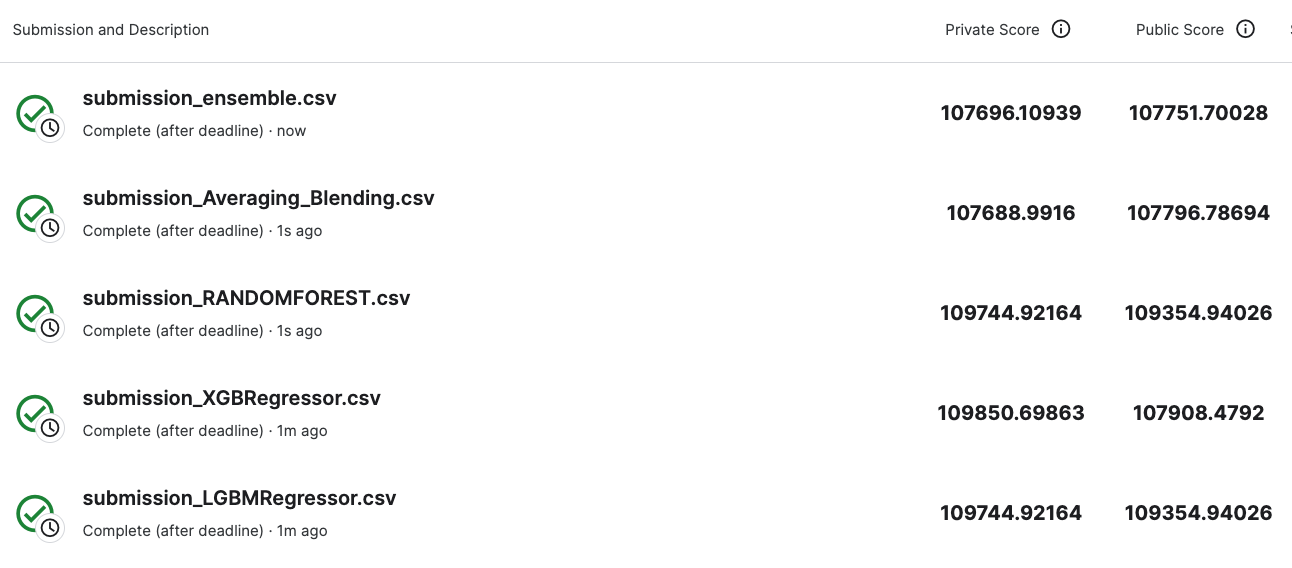

# (8) 결론

이번 프로젝트에서는 모델성능을 최대화시키는 작업을 진행하였습니다. 

캐글을 우승하기 위해서는 물론 computing power, gpu 등이 좋으면,

더 많은 advantage가 있겠지만, 데이터, 특히 domain,에 대한 이해가 바탕이 되어야지 더 좋은 점수를 만들 수 있다는 것을 느꼈습니다. 

feature engineering을 하면서 기본적인 기법들을 활용해서 feature들을 만들 수는 있었으나, 
아마 부동산 전문가들과 함께했다면 domain지식을 바탕으로 더욱 획기적인 feature들을 만들어서 더 좋은 결과를 만들 수 있지 않았을까 생각했습니다. 

경험적으로도 hyperparameter tuning으로 성능을 개선했을 때보다 feature를 추가해서 모델링 했을 때 더 좋은 성능을 낼 수 있었습니다. 

특히 centroid dist feature가 큰 역할을 한것 같아요. 

추후에는 domain지식을 더욱 쌓아서, 예측에 도움이 되는 feature들을 더 찾아봐야겠어요. 

모델 알고리즘도 중요하지만, 여기에 들어가는 feature들을 창의적이게 만들때 더 좋은 성능을 낼 수 있다는 것이 이번 프로젝트 하이라이트였습니다.

감사합니다. 🔥🔥🔥🔥
